In [1]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup

%matplotlib inline

In [77]:
df = pd.read_csv(r"F:\Challenge\NeedsRights_Kenya\data\train.csv", sep=",")
df = df[pd.notnull(df['label'])]
df.head(10)

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression
5,V6VSDJ5I,What are the effects of depression to ones health,Depression
6,9736J4UE,Why is everything so hard to deal with in this...,Depression
7,AY8L479Y,I feel emotionally overwhelmed,Depression
8,OSFJV5EC,How to manage taking alcohol?,Alcohol
9,U4SGUGGM,Is heaven open for us who smoke bhang?,Drugs


In [54]:
df['text'].apply(lambda x: len(x.split(' '))).sum()

4823

In [55]:
 df.groupby("label", sort='count').size().reset_index(name='count')

,label,count
0,Alcohol,140
1,Depression,352
2,Drugs,58
3,Suicide,66


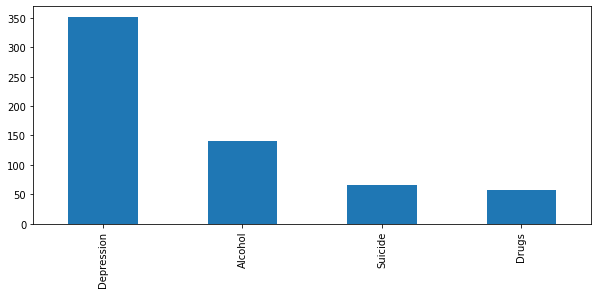

In [56]:
my_tags = ['Alcohol','Depression','Drugs','Suicide']
plt.figure(figsize=(10,4))
df.label.value_counts().plot(kind='bar');

The classes are not well balanced.

In [57]:
def print_plot(index):
    example = df[df.index == index][['text', 'label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])

Have a look a few post and tag pairs.

In [58]:
print_plot(10)

How to survive without money?
Tag: Depression


In [59]:
print_plot(30)

How will I stop? What addiction means.
Tag: Alcohol


The text need to be cleaned up.

In [60]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [78]:
df['text'] = df['text'].apply(clean_text)

In [62]:
print_plot(10)

survive without money
Tag: Depression


In [63]:
df['text'].apply(lambda x: len(x.split(' '))).sum()

2257

In [64]:
df.head(10)

,ID,text,label
0,SUAVK39Z,feel better dieam happy,Depression
1,9JDAGUV3,get hallucinations,Drugs
2,419WR1LQ,stresseed due lack financial support school,Depression
3,6UY7DX6Q,life important,Suicide
4,FYC0FTFB,could helped go depression,Depression
5,V6VSDJ5I,effects depression ones health,Depression
6,9736J4UE,everything hard deal life,Depression
7,AY8L479Y,feel emotionally overwhelmed,Depression
8,OSFJV5EC,manage taking alcohol,Alcohol
9,U4SGUGGM,heaven open us smoke bhang,Drugs


In [81]:
from collections import Counter
x = df
freq=pd.Series(''.join(x['text']).split()).value_counts()
freq_remove =freq[freq==1]
f = lambda x:" ".join(x for x in x.split() if x not in freq_remove)
x['text'] = x['text'].apply(f)

In [34]:
alpha = set(['les','le'])

def clean_text_2(text):
    """
        text: a string
    """
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    
    return text

In [35]:
df['text'] = df['text'].apply(clean_text_2)

In [36]:
df.head(10)

,ID,text,label
0,SUAVK39Z,i feel that it was better i dieam happy,Depression
1,9JDAGUV3,why do i get hallucinations,Drugs
2,419WR1LQ,i am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,why is life important,Suicide
4,FYC0FTFB,how could i be helped to go through the depres...,Depression
5,V6VSDJ5I,what are the effects of depression to ones health,Depression
6,9736J4UE,why is everything so hard to deal with in this...,Depression
7,AY8L479Y,i feel emotionally overwhelmed,Depression
8,OSFJV5EC,how to manage taking alcohol,Alcohol
9,U4SGUGGM,is heaven open for us who smoke bhang,Drugs


In [37]:
X = df.text
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [82]:
X = df.text
y = df.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)



# Naive Bayes classifier for multinomial models

In [83]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [84]:
%%time
from sklearn.metrics import classification_report
y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7297297297297297
              precision    recall  f1-score   support

     Alcohol       0.78      0.81      0.80        43
  Depression       0.70      0.98      0.82        95
       Drugs       1.00      0.23      0.37        22
     Suicide       1.00      0.08      0.15        25

    accuracy                           0.73       185
   macro avg       0.87      0.53      0.53       185
weighted avg       0.79      0.73      0.67       185

Wall time: 28.8 ms


In [29]:
test = pd.read_csv(r"F:\Challenge\NeedsRights_Kenya\data\Test.csv", sep=",")
y_prob = nb.predict_proba(test['text'])
y_prob

array([[0.42491773, 0.19668012, 0.14835865, 0.23004349],
       [0.03142368, 0.87989257, 0.03053051, 0.05815323],
       [0.02660526, 0.91490384, 0.02659604, 0.03189486],
       ...,
       [0.21301781, 0.17995854, 0.12158039, 0.48544326],
       [0.11273976, 0.10876568, 0.66798702, 0.11050754],
       [0.50693092, 0.20858825, 0.07007461, 0.21440623]])

In [30]:
summition = pd.DataFrame(y_prob, columns =nb.classes_)
summition['ID'] = test['ID']
summition = summition[['ID', 'Depression', 'Alcohol' ,'Suicide' ,'Drugs']]
summition.to_csv(r"F:\Challenge\NeedsRights_Kenya\res\submission_nb.csv", index=False)
summition.head(n=3)

,ID,Depression,Alcohol,Suicide,Drugs
0,02V56KMO,0.196680,0.424918,0.230043,0.148359
1,03BMGTOK,0.879893,0.031424,0.058153,0.030531
2,03LZVFM6,0.914904,0.026605,0.031895,0.026596


# Linear support vector machine

In [85]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', CalibratedClassifierCV(base_estimator=SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))),
               ])
sgd.fit(X_train.values, y_train.values)

C:\Users\Soubeiga Armel\Documents\WPy64-3740\python-3.7.4.amd64\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                 CalibratedClassifierCV(base_estimator=SGDClassifier(alpha=0.001,
                                                                     average=False,
                                                                     class_weight=None,
                                                                     early_stoppin

In [86]:
%%time

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.8378378378378378
              precision    recall  f1-score   support

     Alcohol       0.88      0.84      0.86        43
  Depression       0.82      0.95      0.88        95
       Drugs       1.00      0.68      0.81        22
     Suicide       0.74      0.56      0.64        25

    accuracy                           0.84       185
   macro avg       0.86      0.76      0.80       185
weighted avg       0.84      0.84      0.83       185

Wall time: 35.9 ms


In [87]:
test = pd.read_csv(r"F:\Challenge\NeedsRights_Kenya\data\Test.csv", sep=",")
y_prob = sgd.predict_proba(test['text'])
y_prob

array([[0.18808806, 0.71384504, 0.02098314, 0.07708376],
       [0.0272229 , 0.9196932 , 0.01284513, 0.04023877],
       [0.00402335, 0.97668747, 0.00871782, 0.01057135],
       ...,
       [0.16279646, 0.43872036, 0.07050492, 0.32797826],
       [0.00217919, 0.03863266, 0.90936342, 0.04982474],
       [0.71109067, 0.17384727, 0.03087803, 0.08418403]])

In [88]:
summition = pd.DataFrame(y_prob, columns =sgd.classes_)
summition['ID'] = test['ID']
summition = summition[['ID', 'Depression', 'Alcohol' ,'Suicide' ,'Drugs']]
summition.to_csv(r"F:\Challenge\NeedsRights_Kenya\res\submission_sgd.csv", index=False)
summition.head(n=3)

,ID,Depression,Alcohol,Suicide,Drugs
0,02V56KMO,0.713845,0.188088,0.077084,0.020983
1,03BMGTOK,0.919693,0.027223,0.040239,0.012845
2,03LZVFM6,0.976687,0.004023,0.010571,0.008718


# Logistic regression

In [35]:
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)

C:\Users\Soubeiga Armel\Documents\WPy64-3740\python-3.7.4.amd64\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Soubeiga Armel\Documents\WPy64-3740\python-3.7.4.amd64\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 LogisticRegression(C=100000.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=

In [36]:
%%time

y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

accuracy 0.7833333333333333
              precision    recall  f1-score   support

     Alcohol       0.76      0.87      0.81        30
  Depression       0.70      0.93      0.80        30
       Drugs       1.00      0.83      0.91        30
     Suicide       0.71      0.50      0.59        30

    accuracy                           0.78       120
   macro avg       0.79      0.78      0.78       120
weighted avg       0.79      0.78      0.78       120

Wall time: 25.8 ms


# Word2vec embedding and Logistic Regression

In [ ]:
%%time
from gensim.models import Word2Vec

wv = gensim.models.KeyedVectors.load_word2vec_format(r"F:\Challenge\NeedsRights_Kenya\resources\GoogleNews-vectors-negative300.bin.gz", binary=True)
wv.init_sims(replace=True)

In [ ]:
from itertools import islice
list(islice(wv.vocab, 13030, 13050))

The common way is to average the two word vectors. BOW based approaches which includes averaging.

In [47]:
def word_averaging(wv, words):
    all_words, mean = set(), []
    
    for word in words:
        if isinstance(word, np.ndarray):
            mean.append(word)
        elif word in wv.vocab:
            mean.append(wv.syn0norm[wv.vocab[word].index])
            all_words.add(wv.vocab[word].index)

    if not mean:
        logging.warning("cannot compute similarity with no input %s", words)
        # FIXME: remove these examples in pre-processing
        return np.zeros(wv.vector_size,)

    mean = gensim.matutils.unitvec(np.array(mean).mean(axis=0)).astype(np.float32)
    return mean

def  word_averaging_list(wv, text_list):
    return np.vstack([word_averaging(wv, post) for post in text_list ])

In [48]:
def w2v_tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(sent, language='english'):
            if len(word) < 2:
                continue
            tokens.append(word)
    return tokens

In [49]:
train, test = train_test_split(df, test_size=0.3, random_state = 42)

test_tokenized = test.apply(lambda r: w2v_tokenize_text(r['text']), axis=1).values
train_tokenized = train.apply(lambda r: w2v_tokenize_text(r['text']), axis=1).values

In [50]:
X_train_word_average = word_averaging_list(wv,train_tokenized)
X_test_word_average = word_averaging_list(wv,test_tokenized)

C:\Users\Soubeiga Armel\Documents\WPy64-3740\python-3.7.4.amd64\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `syn0norm` (Attribute will be removed in 4.0.0, use self.vectors_norm instead).
  


In [51]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg = logreg.fit(X_train_word_average, train['label'])
y_pred = logreg.predict(X_test_word_average)

C:\Users\Soubeiga Armel\Documents\WPy64-3740\python-3.7.4.amd64\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [54]:
print('accuracy %s' % accuracy_score(y_pred, test.label))
print(classification_report(test.label, y_pred,target_names=my_tags))

accuracy 0.8
              precision    recall  f1-score   support

     Alcohol       0.84      0.88      0.86        43
  Depression       0.85      0.85      0.85        95
       Drugs       0.80      0.73      0.76        22
     Suicide       0.52      0.52      0.52        25

    accuracy                           0.80       185
   macro avg       0.75      0.75      0.75       185
weighted avg       0.80      0.80      0.80       185



### BOW with keras

In [65]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

C:\Users\Soubeiga Armel\Documents\WPy64-3740\python-3.7.4.amd64\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Soubeiga Armel\Documents\WPy64-3740\python-3.7.4.amd64\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Soubeiga Armel\Documents\WPy64-3740\python-3.7.4.amd64\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.i

In [66]:
train_size = int(len(df) * .7)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 431
Test size: 185


In [67]:
train_posts = df['text'][:train_size]
train_tags = df['label'][:train_size]

test_posts = df['text'][train_size:]
test_tags = df['label'][train_size:]

In [68]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [69]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [70]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [71]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [72]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (431, 1000)
x_test shape: (185, 1000)
y_train shape: (431, 4)
y_test shape: (185, 4)


In [73]:
batch_size = 32
epochs = 5

In [74]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [75]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

W0506 20:34:35.571188 821804 deprecation_wrapper.py:119] From C:\Users\Soubeiga Armel\Documents\WPy64-3740\python-3.7.4.amd64\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 387 samples, validate on 44 samples
Epoch 1/5
387/387 [==============================] - ETA: 15s - loss: 1.3828 - accuracy: 0.187 - ETA: 7s - loss: 1.3767 - accuracy: 0.218 - ETA: 4s - loss: 1.3664 - accuracy: 0.29 - ETA: 3s - loss: 1.3550 - accuracy: 0.35 - ETA: 2s - loss: 1.3385 - accuracy: 0.42 - ETA: 1s - loss: 1.3334 - accuracy: 0.44 - ETA: 1s - loss: 1.3225 - accuracy: 0.47 - ETA: 1s - loss: 1.3141 - accuracy: 0.49 - ETA: 0s - loss: 1.3082 - accuracy: 0.50 - ETA: 0s - loss: 1.2936 - accuracy: 0.52 - ETA: 0s - loss: 1.2806 - accuracy: 0.53 - ETA: 0s - loss: 1.2693 - accuracy: 0.55 - 3s 7ms/step - loss: 1.2696 - accuracy: 0.5556 - val_loss: 1.2075 - val_accuracy: 0.5682
Epoch 2/5
387/387 [==============================] - ETA: 0s - loss: 1.0871 - accuracy: 0.65 - ETA: 0s - loss: 1.0772 - accuracy: 0.68 - ETA: 0s - loss: 1.0729 - accuracy: 0.68 - ETA: 0s - loss: 1.0401 - accuracy: 0.75 - ETA: 0s - loss: 1.0351 - accuracy: 0.73 - ETA: 0s - loss: 1.0353 - accuracy: 0.72 - ET

In [77]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

185/185 [==============================] - ETA:  - ETA:  - 0s 591us/step
Test accuracy: 0.6864864826202393


In [78]:
score

[0.7652045968416575, 0.6864864826202393]